In [17]:
from ThesisFunctions import *
from mpl_toolkits.mplot3d import Axes3D


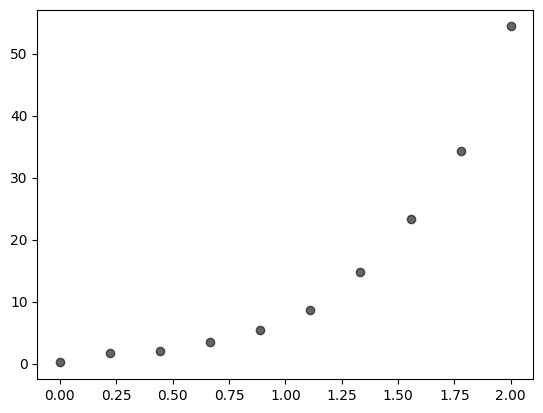

In [29]:
# Generating the data we're working with


# Setting some parameters
num_runs = 1
noise_level = 1
num_data_points = 10

# The Model Parameter
alpha = 2
x0 = 1

# RANGE = [0, 1]

data = data_gen(num_data_points, noise_level, alpha, x0)

plt.scatter(data['Time'], data['Data'], label='Noisy Data', color='k', alpha=0.6)


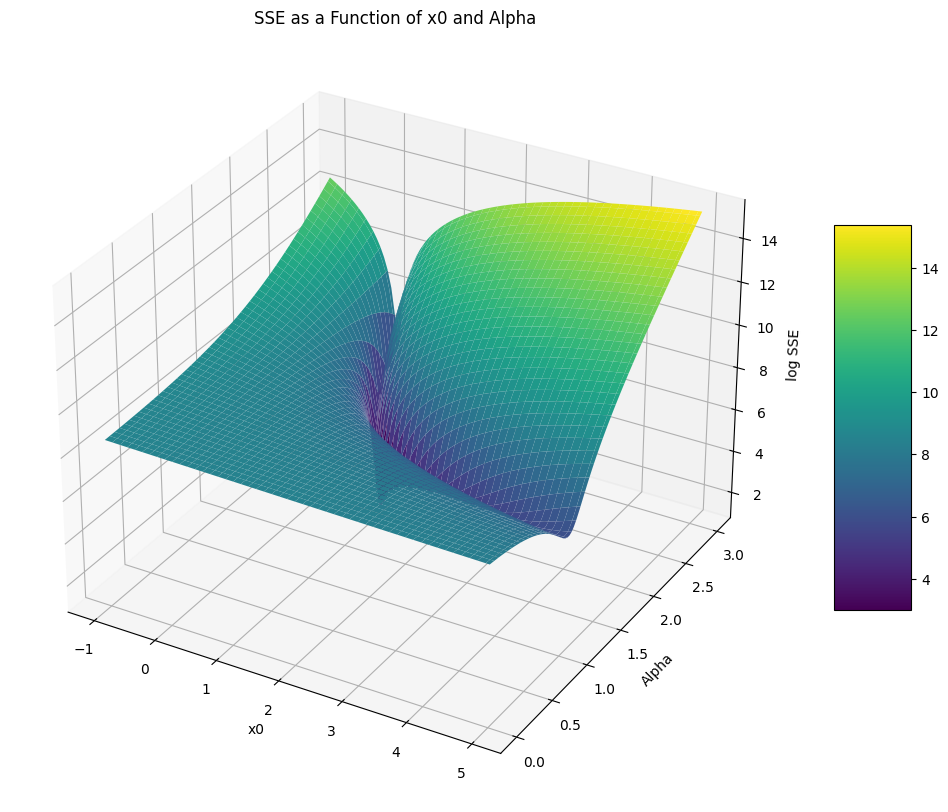

In [30]:
# Plotting the SSE/Error as a function of x0 and alpha, with the data fixed. 
# This gives a visualization of minimas...


# Define the range for alpha and x0
alpha_range = np.linspace(0, 3, 100)  # Adjust the range as needed
x0_range = np.linspace(-1, 5, 100)  # Adjust the range as needed


# Generate a meshgrid for x0 and alpha ranges
X0, Alpha = np.meshgrid(x0_range, alpha_range)


# Initialize an array to store SSE values
SSE_values = np.zeros(X0.shape)


# Compute SSE for each combination of x0 and alpha
for i in range(len(alpha_range)):
    for j in range(len(x0_range)):
        params = (X0[i, j], Alpha[i, j])
        SSE_values[i, j] = sse(params, data)

        
# Creating the plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')


# Surface plot with log scale (since data is exponential)
surf = ax.plot_surface(X0, Alpha, np.log(SSE_values), cmap='viridis', edgecolor='none')


# Labels and title
ax.set_xlabel('x0')
ax.set_ylabel('Alpha')
ax.set_zlabel('log SSE')
ax.set_title('SSE as a Function of x0 and Alpha')


# Colorbar to show the SSE scale better/clearer
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



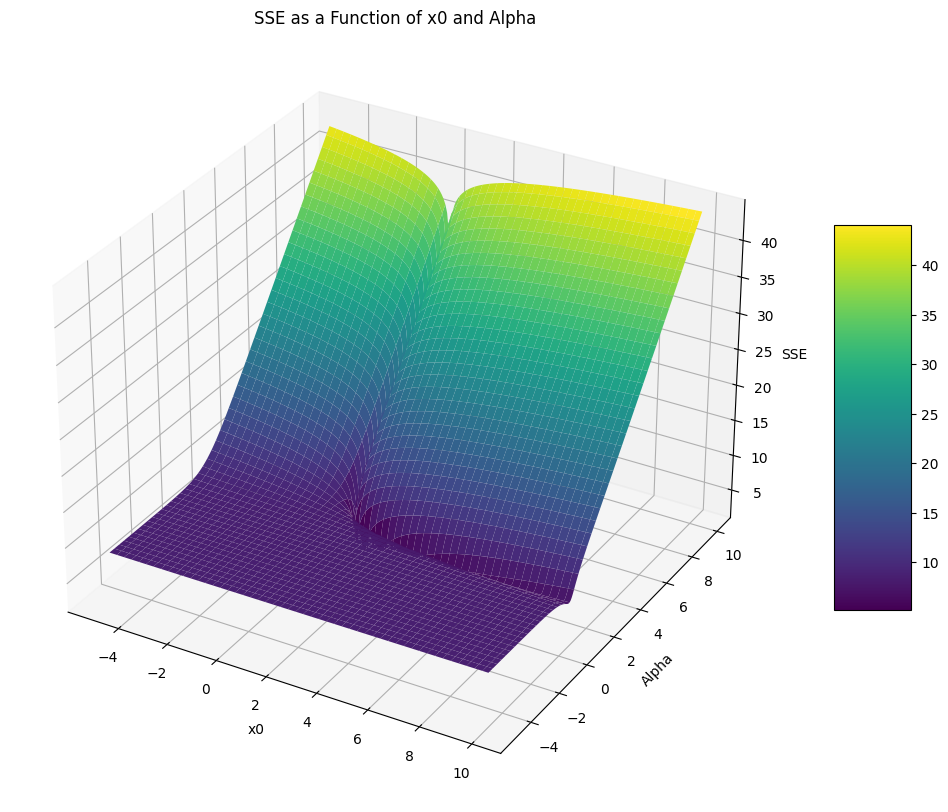

In [19]:
#Zooming OUT

# Define the range for alpha and x0
alpha_range = np.linspace(-5, 10, 200)  # Adjust the range as needed
x0_range = np.linspace(-5, 10, 200)  # Adjust the range as needed

# Generate a meshgrid for x0 and alpha ranges
X0, Alpha = np.meshgrid(x0_range, alpha_range)

# Initialize an array to store SSE values
SSE_values = np.zeros(X0.shape)

# Calculate SSE for each combination of x0 and alpha
for i in range(len(alpha_range)):
    for j in range(len(x0_range)):
        params = (X0[i, j], Alpha[i, j])
        SSE_values[i, j] = sse(params, data)

# Creating the plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X0, Alpha, np.log(SSE_values), cmap='viridis', edgecolor='none')

# Labels and title
ax.set_xlabel('x0')
ax.set_ylabel('Alpha')
ax.set_zlabel('SSE')
ax.set_title('SSE as a Function of x0 and Alpha')

# Colorbar to show the SSE scale
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

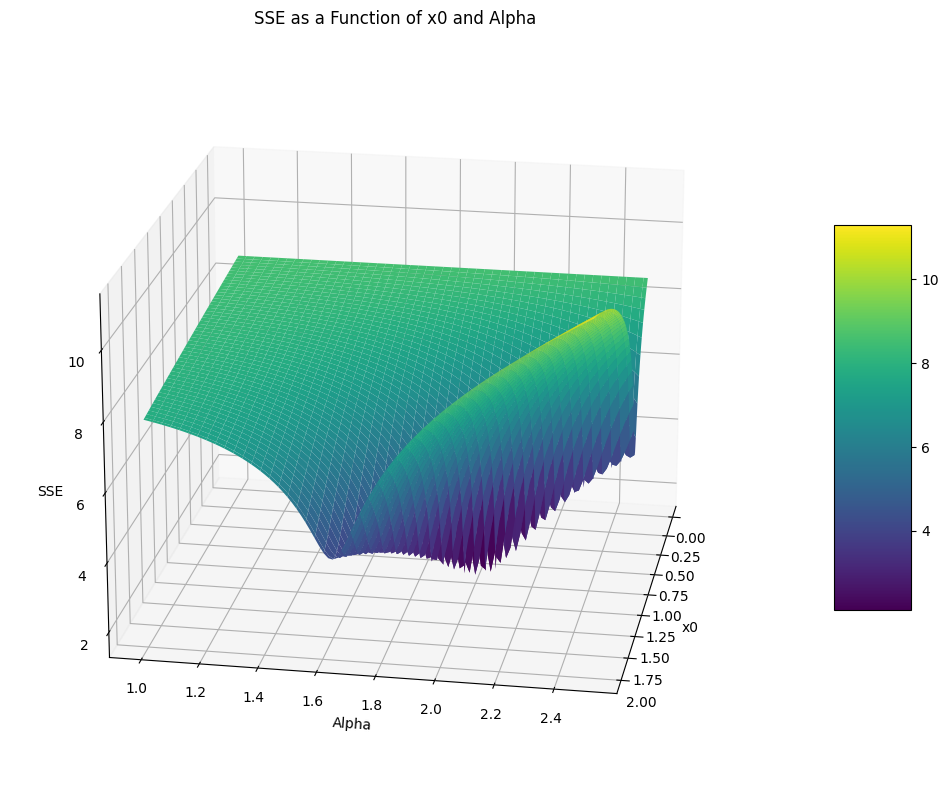

In [27]:
#Zooming IN 


# Define the range for alpha and x0
alpha_range = np.linspace(1, 2.5, 100)  # Adjust the range as needed
x0_range = np.linspace(0, 2, 100)  # Adjust the range as needed

# Generate a meshgrid for x0 and alpha ranges
X0, Alpha = np.meshgrid(x0_range, alpha_range)

# Initialize an array to store SSE values
SSE_values = np.zeros(X0.shape)

# Calculate SSE for each combination of x0 and alpha
for i in range(len(alpha_range)):
    for j in range(len(x0_range)):
        params = (X0[i, j], Alpha[i, j])
        SSE_values[i, j] = sse(params, data)

# Creating the plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X0, Alpha, np.log(SSE_values), cmap='viridis', edgecolor='none')

# Labels and title
ax.set_xlabel('x0')
ax.set_ylabel('Alpha')
ax.set_zlabel('SSE')
ax.set_title('SSE as a Function of x0 and Alpha')

ax.view_init(elev=20, azim=10)  # elev is the elevation angle, azim is the azimuth angle


# Colorbar to show the SSE scale
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

OBSERVATIONS

- Error is very sensitive to alpha, while not as sensitive to x0 - makes sense

- One single minima in this case, where we have minimal noise

/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Optimization failed: ABNORMAL_TERMINATION_IN_LNSRCH for (x0, alpha) = (-0.7142857142857144, -4.183673469387755)
Optimization failed: ABNORMAL_TERMINATION_IN_LNSRCH for (x0, alpha) = (-2.9591836734693877, 4.795918367346939)


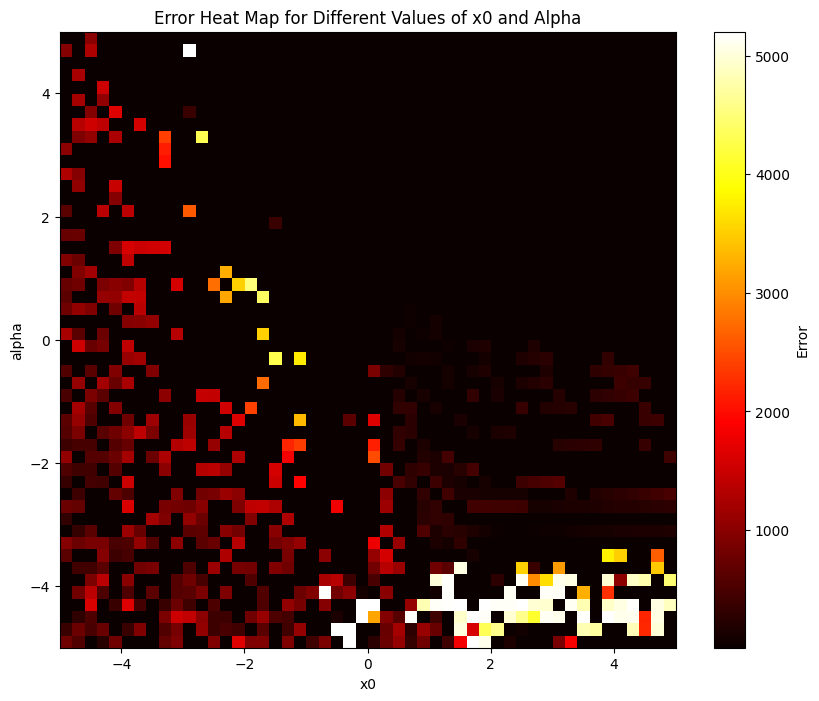

In [31]:
# "zooming in" to see how smaller changes in initial values affect minimas...
num_runs = 1
noise_level = 1
num_data_points = 10

all_params = []
errors = []

# Generate Data
data = data_gen(num_data_points, noise_level)

# Define the range for alpha and x0
alpha_range = np.linspace(-5, 5, 50)  # Adjust the range as needed
x0_range = np.linspace(-5, 5,50)  # Adjust the range as needed

# Compute the error matrix
error_mat = error_matrix(alpha_range, x0_range, data)

# Plotting the heat map
plt.figure(figsize=(10, 8))
# The extent should be set to the range of x0 and alpha values
# If x0_range and alpha_range are not starting from 0, adjust the extent accordingly
extent = [x0_range[0], x0_range[-1], alpha_range[0], alpha_range[-1]]
plt.imshow(error_mat, cmap='hot', interpolation='nearest', extent=extent, origin='lower')
plt.colorbar(label='Error')
plt.xlabel('x0')
plt.ylabel('alpha')
plt.title('Error Heat Map for Different Values of x0 and Alpha')
plt.show()